<a href="https://www.kaggle.com/code/salmaashraf12/fitbit-tracker-analysis?scriptVersionId=165283402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px 

In [3]:
df=pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
df.shape

(940, 15)

In [5]:
df.rename(columns={'ActivityDate':'date'},inplace=True)

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df.head()

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
df=df[['Id','date','TotalSteps','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']]

In [9]:
df['totalmin']=df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']+df['SedentaryMinutes']

In [10]:
df['totalhr']=df['totalmin']//60

In [11]:
df['days']=df['date'].dt.day_name()

In [12]:
df.head()

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalmin,totalhr,days
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,16,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17,Saturday


In [13]:
df.isnull().sum()

Id                      0
date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
totalmin                0
totalhr                 0
days                    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalmin,totalhr
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.067021
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.646936


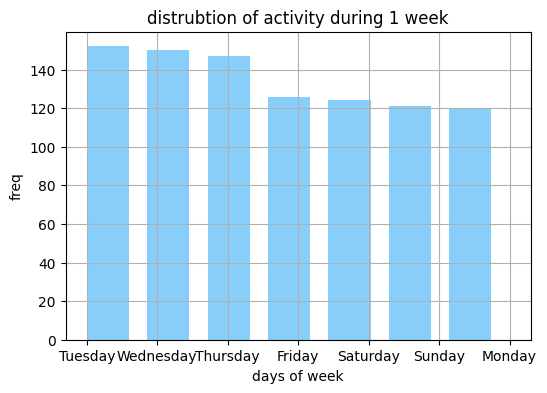

In [16]:
plt.figure(figsize=[6,4])
plt.hist(x='days',bins=7,width=0.6,color="lightskyblue",data=df)
plt.grid(True)
plt.xlabel("days of week")
plt.ylabel("freq")
plt.title("distrubtion of activity during 1 week");

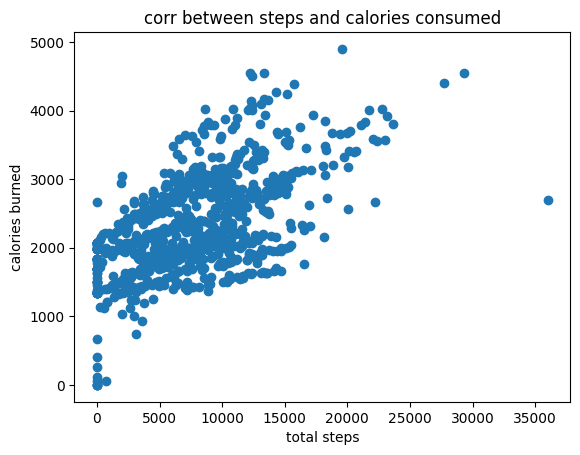

In [17]:
plt.scatter(x='TotalSteps',y="Calories",data=df)
plt.xlabel("total steps")
plt.ylabel("calories burned")
plt.title("corr between steps and calories consumed");

In [18]:
df['Calories'].corr(df['TotalSteps'])

0.5915680862453355

In [19]:
# multicorr between features 
df.drop(columns=['Calories','Id']).select_dtypes("number").corr()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,totalmin,totalhr
TotalSteps,1.000000,0.667079,0.498693,0.569600,-0.327484,-0.017285,-0.021304
VeryActiveMinutes,0.667079,1.000000,0.312420,0.051926,-0.164671,-0.018244,-0.018647
FairlyActiveMinutes,0.498693,0.312420,1.000000,0.148820,-0.237446,-0.094155,-0.098041
LightlyActiveMinutes,0.569600,0.051926,0.148820,1.000000,-0.437104,-0.067049,-0.073836
SedentaryMinutes,-0.327484,-0.164671,-0.237446,-0.437104,1.000000,0.915243,0.916739
totalmin,-0.017285,-0.018244,-0.094155,-0.067049,0.915243,1.000000,0.998566
totalhr,-0.021304,-0.018647,-0.098041,-0.073836,0.916739,0.998566,1.000000


In [20]:
df.drop(columns=['Id']).select_dtypes("number").corr()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalmin,totalhr
TotalSteps,1.000000,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285,-0.021304
VeryActiveMinutes,0.667079,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244,-0.018647
FairlyActiveMinutes,0.498693,0.312420,1.000000,0.148820,-0.237446,0.297623,-0.094155,-0.098041
LightlyActiveMinutes,0.569600,0.051926,0.148820,1.000000,-0.437104,0.286718,-0.067049,-0.073836
SedentaryMinutes,-0.327484,-0.164671,-0.237446,-0.437104,1.000000,-0.106973,0.915243,0.916739
Calories,0.591568,0.615838,0.297623,0.286718,-0.106973,1.000000,0.094951,0.090342
totalmin,-0.017285,-0.018244,-0.094155,-0.067049,0.915243,0.094951,1.000000,0.998566
totalhr,-0.021304,-0.018647,-0.098041,-0.073836,0.916739,0.090342,0.998566,1.000000


In [21]:
# veryactivemin and total steps have high corr with calories consumed

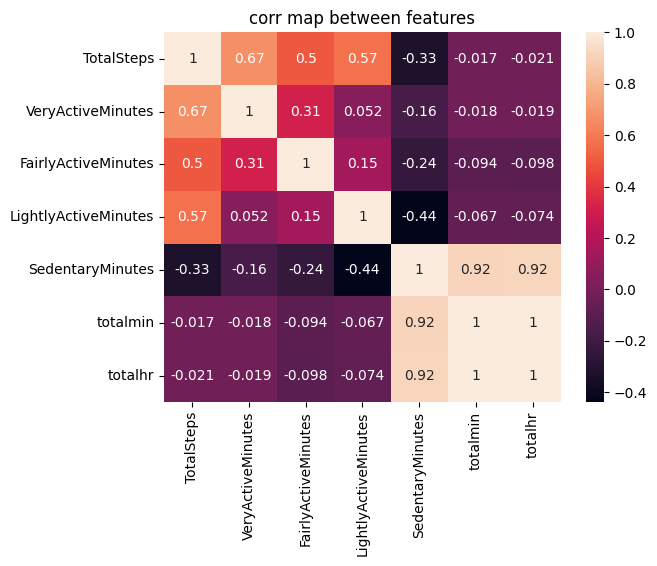

In [22]:
corr=df.drop(columns=['Calories','Id']).select_dtypes("number").corr()
sns.heatmap(corr,annot=True)
plt.title("corr map between features");

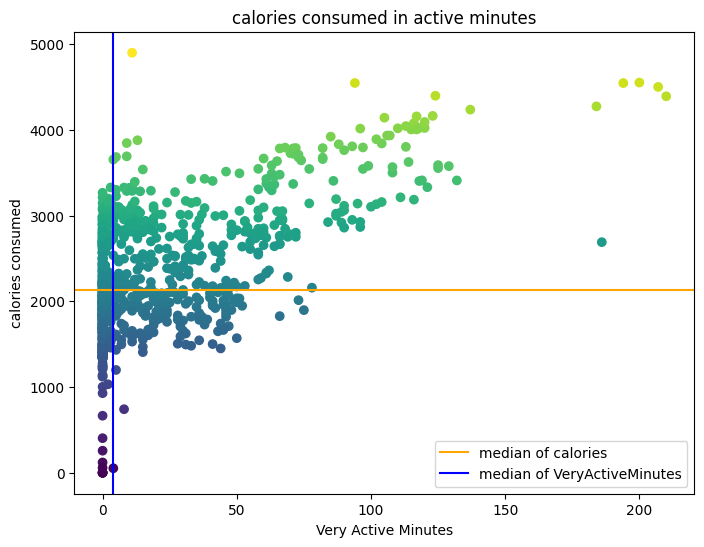

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(x=df["VeryActiveMinutes"],y=df["Calories"],c=df["Calories"])
plt.xlabel("Very Active Minutes")
plt.ylabel("calories consumed")
plt.title("calories consumed in active minutes")
plt.axhline(df['Calories'].median(),label="median of calories",color="orange")
plt.axvline(df['VeryActiveMinutes'].median(),label="median of VeryActiveMinutes",color="blue")
plt.legend();

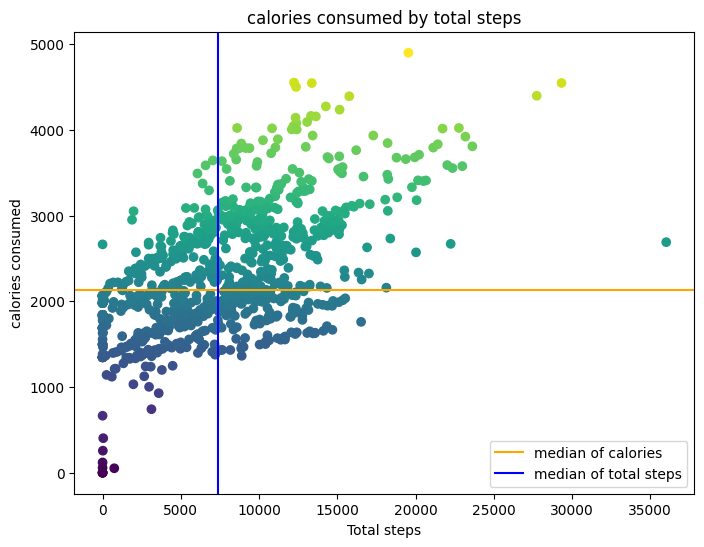

In [24]:
plt.figure(figsize=[8,6])
plt.scatter(x=df["TotalSteps"],y=df["Calories"],c=df["Calories"])
plt.xlabel("Total steps")
plt.ylabel("calories consumed")
plt.title("calories consumed by total steps")
plt.axhline(df['Calories'].median(),label="median of calories",color="orange")
plt.axvline(df['TotalSteps'].median(),label="median of total steps",color="blue")
plt.legend();

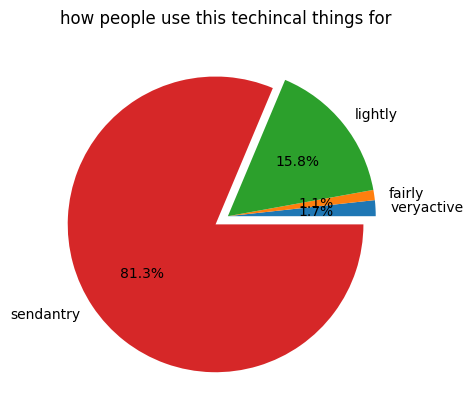

In [25]:
veryactive=df['VeryActiveMinutes'].sum()
fairly=df['FairlyActiveMinutes'].sum()
lightly=df['LightlyActiveMinutes'].sum()
sendantry=df['SedentaryMinutes'].sum()
minutes=[veryactive,fairly,lightly,sendantry]
labels=['veryactive','fairly','lightly','sendantry']
plt.pie(minutes,labels=labels,autopct="%1.1f%%",explode=[0,0,0,0.1])
plt.title("how people use this techincal things for ")
plt.show();

In [26]:
# as we see people use this things for there daily activites not for sports and in weekend they have very low activity